In [1]:
import pandas as pd
import glob
import numpy as np

In [2]:
data = {
    '33': 'Regular insulin dose',
    '34' : 'NPH insulin dose',
    '35' : 'UltraLente insulin dose',
    '48' : 'Unspecified blood glucose measurement',
    '58' : 'Pre-breakfast blood glucose measurement',
    '59' : 'Post-breakfast blood glucose measurement',
    '60' : 'Pre-lunch blood glucose measurement',
    '61' : 'Post-lunch blood glucose measurement',
    '62' : 'Pre-supper blood glucose measurement',
    '63' : 'Post-supper blood glucose measurement',
    '64' : 'Pre-snack blood glucose measurement',
    '65' : 'Hypoglycemic symptoms',
    '66' : 'Typical meal ingestion',
    '67' : 'More-than-usual meal ingestion',
    '68' : 'Less-than-usual meal ingestion',
    '69' : 'Typical exercise activity',
    '70' : 'More-than-usual exercise activity',
    '71' : 'Less-than-usual exercise activity',
    '72' : 'Unspecified special event'
}

In [3]:
first = ['Person', 'Date', 'Time']
data1 = first + list(data.values())

In [4]:
maindf = pd.DataFrame()
for name in glob.glob('data/data-*'):
    name = name.replace("\\", "/")
    p = name.split("/")[-1].replace("data-", "Person")
    df = pd.DataFrame()
    newcols = []
    

    with open(name, "r") as f:
        fdata = f.readlines()

    
    ndata = []
    for fd in fdata:
        ndata.append(fd.split("\t"))
    ndata[0]
        
    a = []
    for n in ndata:
        try:
            if (n[0], n[1]) not in a:
                a.append((p, n[0], n[1]))
        except Exception as e:
            pass
      
    # a[0]
    df['Person'], df['Date'], df['Time'] = zip(*a)
    df.set_index('Date', inplace=True)

    for n in ndata:
        try:
            if n[2] == '57':
                n[2] = '48'
            if n[2] in data:
                df.loc[n[0], data[n[2]]] = float(n[3].replace("\n", ""))
        except Exception as e:
            print(e)
            df.loc[n[0], data[n[2]]] = np.nan
        
    df.reset_index(inplace=True)
    dfcols = set(df.columns.tolist())
    df = df[list(dfcols)]
    
        
    # try:
    #     pd.concat([maindf, df], ignore_index=True)
    # except Exception as e:
    #     print(e)
    maindf = pd.concat([maindf, df], ignore_index=True)
    

could not convert string to float: '0Hi'
could not convert string to float: '0Hi'
could not convert string to float: '0Hi'
could not convert string to float: '0Hi'
could not convert string to float: '0Hi'
could not convert string to float: '0Lo'
could not convert string to float: '0Hi'
could not convert string to float: '3A'
could not convert string to float: '3A'
could not convert string to float: '3A'
could not convert string to float: '3A'
could not convert string to float: '3A'
could not convert string to float: '3A'
could not convert string to float: '3A'
could not convert string to float: '3A'
could not convert string to float: '3A'
could not convert string to float: '3A'
could not convert string to float: '3A'
could not convert string to float: "0''"


In [5]:
maindf = maindf[data1]
maindf.head()

,Person,Date,Time,Regular insulin dose,NPH insulin dose,UltraLente insulin dose,Unspecified blood glucose measurement,Pre-breakfast blood glucose measurement,Post-breakfast blood glucose measurement,Pre-lunch blood glucose measurement,...,Post-supper blood glucose measurement,Pre-snack blood glucose measurement,Hypoglycemic symptoms,Typical meal ingestion,More-than-usual meal ingestion,Less-than-usual meal ingestion,Typical exercise activity,More-than-usual exercise activity,Less-than-usual exercise activity,Unspecified special event
0,Person01,04-21-1991,9:09,7.0,13.0,NaN,123.0,100.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Person01,04-21-1991,9:09,7.0,13.0,NaN,123.0,100.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Person01,04-21-1991,9:09,7.0,13.0,NaN,123.0,100.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Person01,04-21-1991,17:08,7.0,13.0,NaN,123.0,100.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Person01,04-21-1991,17:08,7.0,13.0,NaN,123.0,100.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29330 entries, 0 to 29329
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Person                                    29330 non-null  object 
 1   Date                                      29330 non-null  object 
 2   Time                                      29330 non-null  object 
 3   Regular insulin dose                      27212 non-null  float64
 4   NPH insulin dose                          20848 non-null  float64
 5   UltraLente insulin dose                   6856 non-null   float64
 6   Unspecified blood glucose measurement     18476 non-null  float64
 7   Pre-breakfast blood glucose measurement   26954 non-null  float64
 8   Post-breakfast blood glucose measurement  148 non-null    float64
 9   Pre-lunch blood glucose measurement       22117 non-null  float64
 10  Post-lunch blood glucose measureme

In [7]:
# cols = maindf.columns.tolist()
# cols.remove('Person')
# cols.remove('Date')
# cols.remove('Time')
# for P in maindf.Person.unique().tolist():
#     for c in cols:
#         try:
#             print(f"{P} {c} - {maindf[maindf['Person'] == P][c].unique()}")
#         except Exception as e:
#             print(f"{P} {c} - {maindf[maindf['Person'] == P][c].nunique()}")
#             print(f"{P} - {c} \n {e}")
#     print("-------------------------------------------------------------")

In [8]:
crrcols = ['Regular insulin dose', 'NPH insulin dose', 'Unspecified blood glucose measurement','Pre-breakfast blood glucose measurement','Pre-lunch blood glucose measurement','Pre-supper blood glucose measurement']
ndf = maindf[crrcols]

In [9]:
ndf.head()

,Regular insulin dose,NPH insulin dose,Unspecified blood glucose measurement,Pre-breakfast blood glucose measurement,Pre-lunch blood glucose measurement,Pre-supper blood glucose measurement
0,7.0,13.0,123.0,100.0,NaN,119.0
1,7.0,13.0,123.0,100.0,NaN,119.0
2,7.0,13.0,123.0,100.0,NaN,119.0
3,7.0,13.0,123.0,100.0,NaN,119.0
4,7.0,13.0,123.0,100.0,NaN,119.0


In [10]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29330 entries, 0 to 29329
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Regular insulin dose                     27212 non-null  float64
 1   NPH insulin dose                         20848 non-null  float64
 2   Unspecified blood glucose measurement    18476 non-null  float64
 3   Pre-breakfast blood glucose measurement  26954 non-null  float64
 4   Pre-lunch blood glucose measurement      22117 non-null  float64
 5   Pre-supper blood glucose measurement     24918 non-null  float64
dtypes: float64(6)
memory usage: 1.3 MB


In [ ]:
ndf.dex

In [11]:
for c in crrcols:
    # print(f"{c} Unique - {df[c].unique()}")
    print(f"{c} Count - {ndf[c].count()}")
    print(f"{c} Mean - {ndf[c].mean()}")
    print(f"{c} Median - {ndf[c].median()}")
    median = ndf[c].median()
    ndf[c].fillna(median, inplace=True)
    print(f"{c} Count - {ndf[c].count()}")
    print("-------------------------------------------")

Regular insulin dose Count - 27212
Regular insulin dose Mean - 6.480100690871674
Regular insulin dose Median - 6.0
Regular insulin dose Count - 29330
-------------------------------------------
NPH insulin dose Count - 20848
NPH insulin dose Mean - 14.981413085188027
NPH insulin dose Median - 14.0
NPH insulin dose Count - 29330
-------------------------------------------
Unspecified blood glucose measurement Count - 18476
Unspecified blood glucose measurement Mean - 169.6711409395973
Unspecified blood glucose measurement Median - 159.0
Unspecified blood glucose measurement Count - 29330
-------------------------------------------
Pre-breakfast blood glucose measurement Count - 26954
Pre-breakfast blood glucose measurement Mean - 173.46727758403205
Pre-breakfast blood glucose measurement Median - 167.0
Pre-breakfast blood glucose measurement Count - 29330
-------------------------------------------
Pre-lunch blood glucose measurement Count - 22117
Pre-lunch blood glucose measurement Mea

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [12]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme()

<AxesSubplot:>

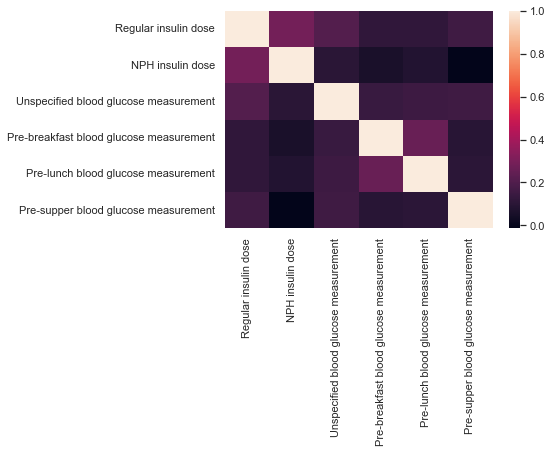

In [13]:
sns.heatmap(ndf.corr())

<AxesSubplot:title={'center':'Pre-supper blood glucose measurement'}, xlabel='Pre-supper blood glucose measurement', ylabel='Count'>

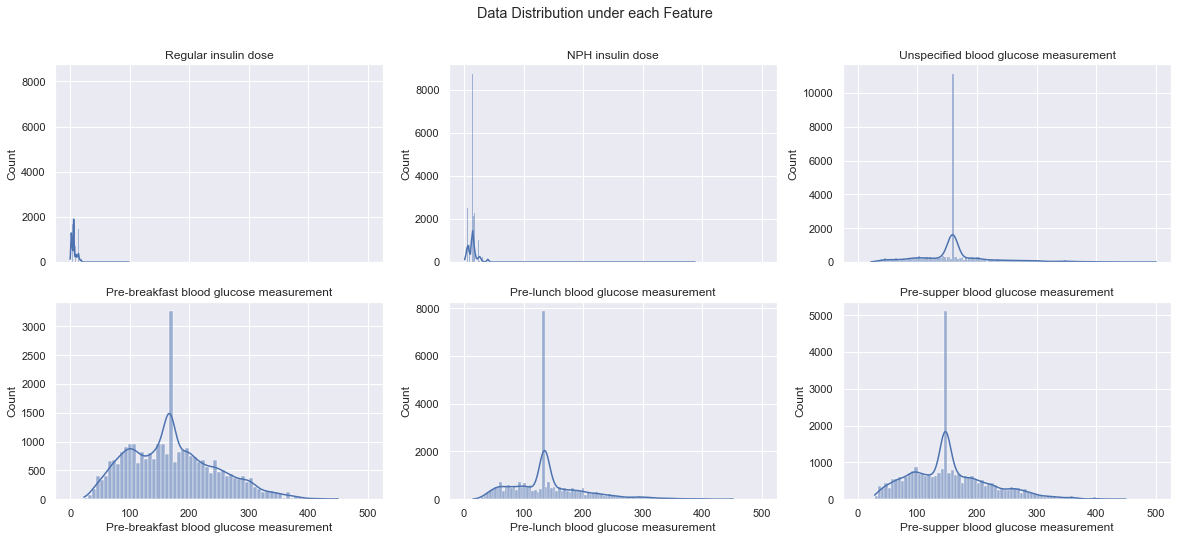

In [14]:
fig, axes = plt.subplots(2,3, sharex=True, figsize=(20,8))
fig.suptitle("Data Distribution under each Feature")
axes[0,0].set_title(crrcols[0])
sns.histplot(ax=axes[0,0], data=ndf[crrcols[0]], kde=True)
axes[0,1].set_title(crrcols[1])
sns.histplot(ax=axes[0,1], data=ndf[crrcols[1]], kde=True)
axes[0,2].set_title(crrcols[2])
sns.histplot(ax=axes[0,2], data=ndf[crrcols[2]], kde=True)
axes[1,0].set_title(crrcols[3])
sns.histplot(ax=axes[1,0], data=ndf[crrcols[3]], kde=True)
axes[1,1].set_title(crrcols[4])
sns.histplot(ax=axes[1,1], data=ndf[crrcols[4]], kde=True)
axes[1,2].set_title(crrcols[5])
sns.histplot(ax=axes[1,2], data=ndf[crrcols[5]], kde=True)

<AxesSubplot:title={'center':'Outliar in Pre-supper blood glucose measurement'}>

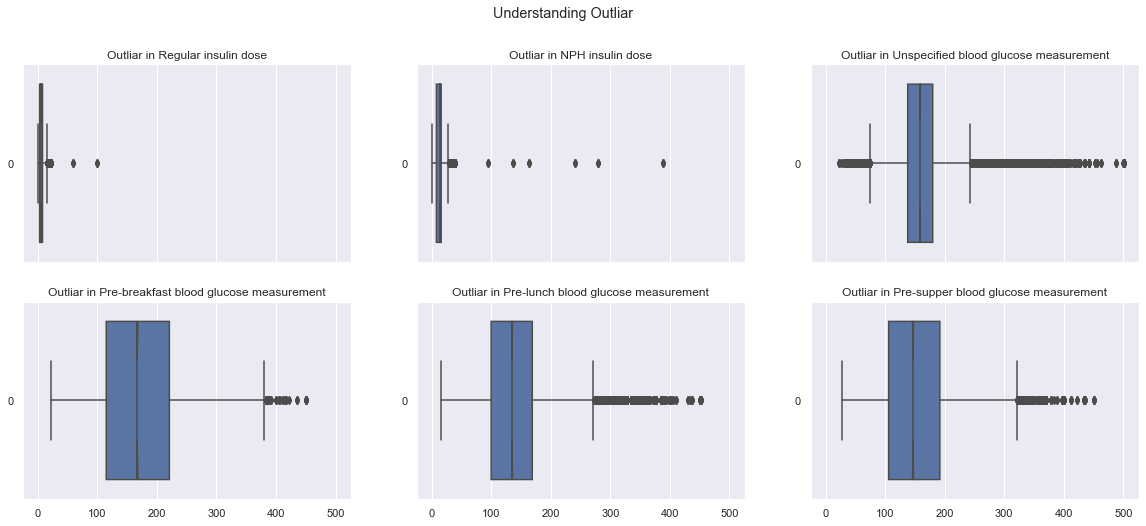

In [15]:
fig, axes = plt.subplots(2,3, sharex=True, figsize=(20,8))
fig.suptitle("Understanding Outliar")
axes[0,0].set_title(f"Outliar in {crrcols[0]}")
sns.boxplot(ax=axes[0,0], data=ndf[crrcols[0]], orient='h', notch=True)
axes[0,1].set_title(f"Outliar in {crrcols[1]}")
sns.boxplot(ax=axes[0,1], data=ndf[crrcols[1]], orient='h', notch=True)
axes[0,2].set_title(f"Outliar in {crrcols[2]}")
sns.boxplot(ax=axes[0,2], data=ndf[crrcols[2]], orient='h', notch=True)
axes[1,0].set_title(f"Outliar in {crrcols[3]}")
sns.boxplot(ax=axes[1,0], data=ndf[crrcols[3]], orient='h', notch=True)
axes[1,1].set_title(f"Outliar in {crrcols[4]}")
sns.boxplot(ax=axes[1,1], data=ndf[crrcols[4]], orient='h', notch=True)
axes[1,2].set_title(f"Outliar in {crrcols[5]}")
sns.boxplot(ax=axes[1,2], data=ndf[crrcols[5]], orient='h', notch=True)

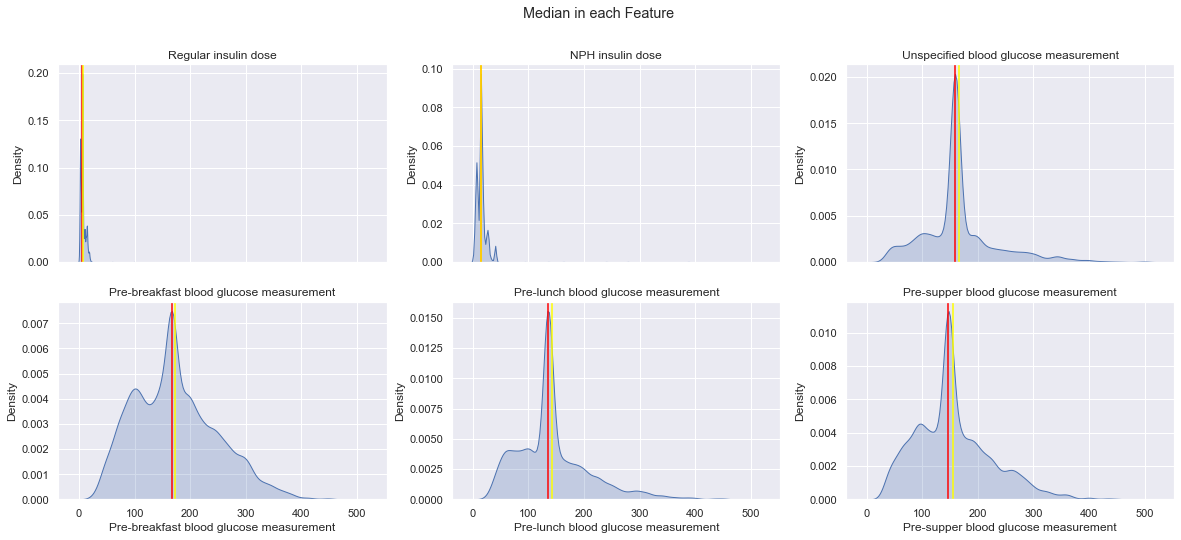

In [16]:
fig, axes = plt.subplots(2,3, sharex=True, figsize=(20,8))
fig.suptitle("Median in each Feature")

axes[0,0].set_title(crrcols[0])
sns.kdeplot(ax=axes[0,0], data=ndf[crrcols[0]], shade=True)
axes[0,0].axvline(ndf[crrcols[0]].median(), c='red')
axes[0,0].axvline(ndf[crrcols[0]].mean(), c='yellow')

axes[0,1].set_title(crrcols[1])
sns.kdeplot(ax=axes[0,1], data=ndf[crrcols[1]], shade=True)
axes[0,1].axvline(ndf[crrcols[1]].median(), c='red')
axes[0,1].axvline(ndf[crrcols[1]].mean(), c='yellow')

axes[0,2].set_title(crrcols[2])
sns.kdeplot(ax=axes[0,2], data=ndf[crrcols[2]], shade=True)
axes[0,2].axvline(ndf[crrcols[2]].median(), c='red')
axes[0,2].axvline(ndf[crrcols[2]].mean(), c='yellow')

axes[1,0].set_title(crrcols[3])
sns.kdeplot(ax=axes[1,0], data=ndf[crrcols[3]], shade=True)
axes[1,0].axvline(ndf[crrcols[3]].median(), c='red')
axes[1,0].axvline(ndf[crrcols[3]].mean(), c='yellow')

axes[1,1].set_title(crrcols[4])
sns.kdeplot(ax=axes[1,1], data=ndf[crrcols[4]], shade=True)
axes[1,1].axvline(ndf[crrcols[4]].median(), c='red')
axes[1,1].axvline(ndf[crrcols[4]].mean(), c='yellow')

axes[1,2].set_title(crrcols[5])
sns.kdeplot(ax=axes[1,2], data=ndf[crrcols[5]], shade=True)
axes[1,2].axvline(ndf[crrcols[5]].median(), c='red')
axes[1,2].axvline(ndf[crrcols[5]].mean(), c='yellow')

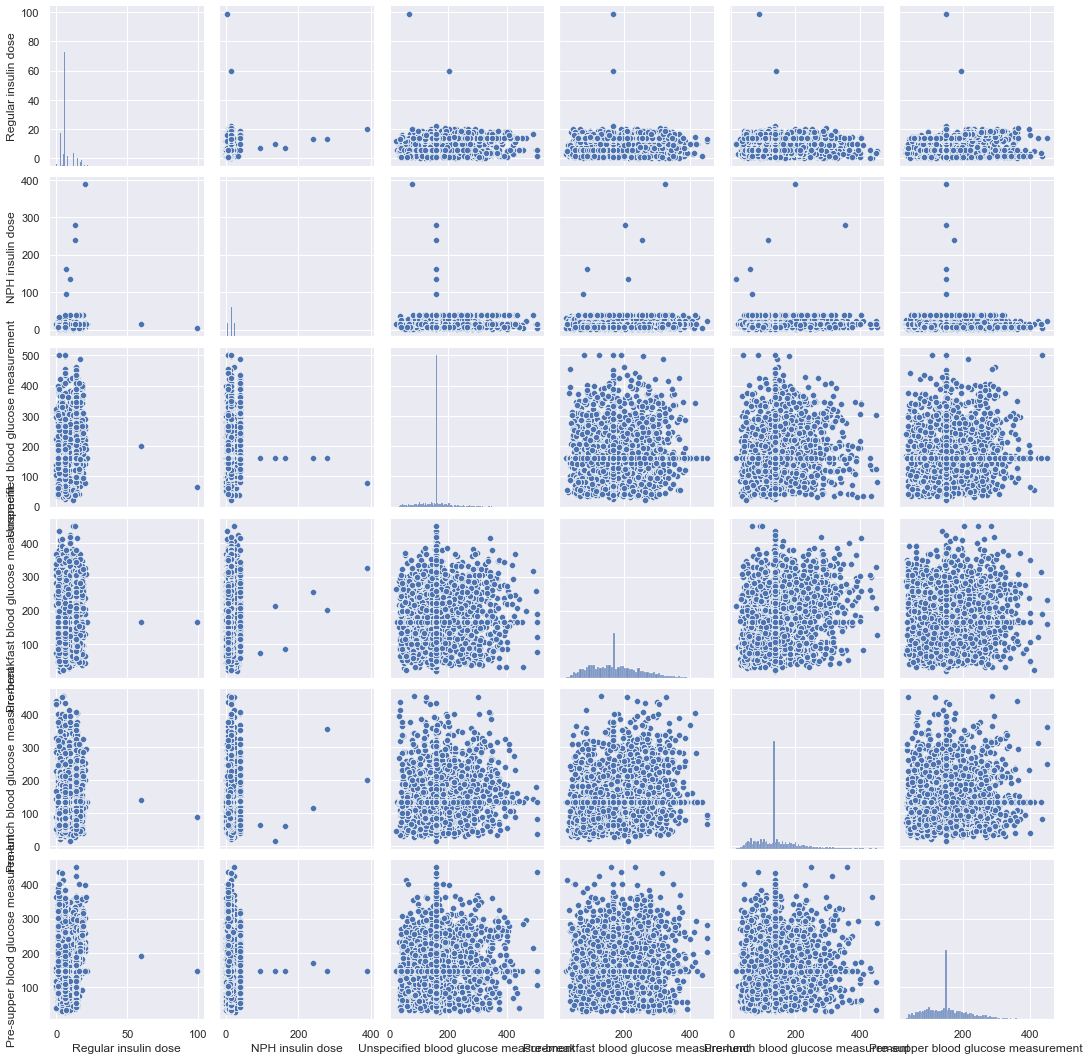

In [17]:
sns.pairplot(ndf)

In [18]:
crrcols

['Regular insulin dose',
 'NPH insulin dose',
 'Unspecified blood glucose measurement',
 'Pre-breakfast blood glucose measurement',
 'Pre-lunch blood glucose measurement',
 'Pre-supper blood glucose measurement']

<AxesSubplot:xlabel='Pre-breakfast blood glucose measurement', ylabel='Pre-lunch blood glucose measurement'>

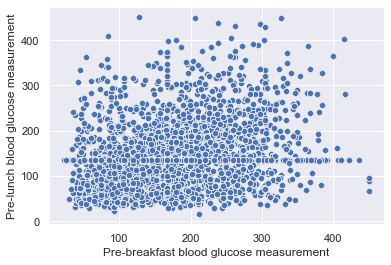

In [19]:
sns.scatterplot(x=ndf['Pre-breakfast blood glucose measurement'],y=ndf['Pre-lunch blood glucose measurement'])

In [20]:
crrcols

['Regular insulin dose',
 'NPH insulin dose',
 'Unspecified blood glucose measurement',
 'Pre-breakfast blood glucose measurement',
 'Pre-lunch blood glucose measurement',
 'Pre-supper blood glucose measurement']

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [22]:
X = ndf[['Pre-breakfast blood glucose measurement',
 'Pre-lunch blood glucose measurement',
 'Pre-supper blood glucose measurement']]
y = ndf['Unspecified blood glucose measurement']

In [23]:
y.values.reshape(1, -1)

array([[123., 123., 123., ..., 159., 159., 159.]])

In [24]:
# poly = PolynomialFeatures(degree=2)
# X_ = poly.fit_transform(X.values)
# predict_ = poly.fit_transform(y.values.reshape(1, -1))


poly_regr = PolynomialFeatures(degree = 4)
X_poly = poly_regr.fit_transform(X.values)
lin_reg_poly = linear_model.LinearRegression()
lin_reg_poly.fit(X_poly, y)

LinearRegression()

In [25]:
clf = linear_model.LinearRegression()
clf.fit(X, y)

LinearRegression()

In [26]:
clf.predict([[90.0, 118.0, 135.5]])

array([152.91001536])